Degree Centrality:
Node: f82dhKNiUXsDVPMLqKYiIQ, Degree Centrality: 159.0
Node: FJDvhCGIwKuohPOK7JfLuA, Degree Centrality: 1.0
Node: KDcHC6Es_jv4tloj0NP6gA, Degree Centrality: 19.0
Node: D7z_V6E8cxXghSRcHAmUPg, Degree Centrality: 38.0
Node: rrdSkNz4YG6eDgOq3ov0IQ, Degree Centrality: 64.0
Node: nzIx3Wze25rr5k32sDCwaA, Degree Centrality: 23.0
Node: zQ62qOqUQScSb7ZCTLbpGg, Degree Centrality: 180.0
Node: mWv9wdM5OD7tiDzf3DkyXw, Degree Centrality: 24.0
Node: AKFahOtdDQA7NVXZyDajCA, Degree Centrality: 66.0
Node: oQYZ3j2H758y07p4RpCWug, Degree Centrality: 2.0
Node: IXv-g1iK3Hwsnxp0vT8OgA, Degree Centrality: 161.00000000000003
Node: bCIZeggW02uPdz2lobSjUA, Degree Centrality: 63.00000000000001
Node: Y3ZCO17N1_T_Ms1JmswwzA, Degree Centrality: 116.0
Node: lhsQkb5nhf-Kd5OvgB9MNg, Degree Centrality: 50.00000000000001
Node: XyGRDrgCK0z4CiA6nhwEaw, Degree Centrality: 113.0
Node: -3-6BB10tIWNKGEF0Es2BA, Degree Centrality: 94.0
Node: aZyCHVqXnz81fW1_KbFq0w, Degree Centrality: 4.0
Node: PsHzOS-Jao5CpRl5

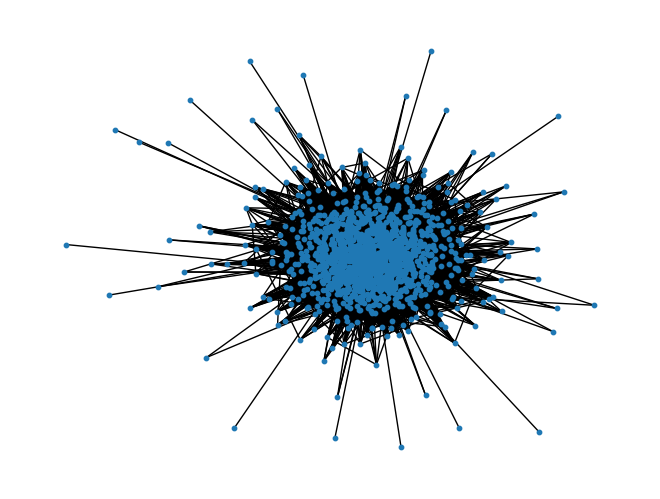

In [2]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the criteria
review_count_threshold = 65
city_to_match = "Tucson"
max_stars = 2.0  # Maximum star rating for reviews

# Load business data into a DataFrame
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
business_data = business_data[['business_id', 'city', 'review_count']]  # Keep only specified columns

# Filter businesses based on criteria
filtered_businesses = business_data[(business_data['city'] == city_to_match) & (business_data['review_count'] >= review_count_threshold)]

# Load review data into a DataFrame
review_data = pd.read_json('yelp_academic_dataset_review.json', lines=True)
review_data = review_data[['business_id', 'user_id', 'stars']]  # Keep only specified columns

# Filter reviews associated with filtered businesses and with stars <= 2
filtered_review_data = review_data[(review_data['business_id'].isin(filtered_businesses['business_id'])) & (review_data['stars'] <= max_stars)]

# Create a user-business association DataFrame
user_business_associations = filtered_review_data.groupby('user_id')['business_id'].apply(set).reset_index()

# Create a network graph
graph = nx.Graph()

# Add nodes to the graph
graph.add_nodes_from(filtered_businesses['business_id'])

# Add edges based on common reviewers
for _, row in user_business_associations.iterrows():
    businesses = list(row['business_id'])
    if len(businesses) > 1:
        for business1 in businesses:
            for business2 in businesses:
                if business1 < business2:  # Avoid self-comparison and duplicates
                    graph.add_edge(business1, business2)


                    
filtered_graph = graph.copy()
isolated_nodes = [node for node,degree in dict(graph.degree()).items() if degree ==0]
filtered_graph.remove_nodes_from(isolated_nodes)

# Compute degree centrality for all nodes
degree_centrality = nx.degree_centrality(filtered_graph)
total_nodes = filtered_graph.number_of_nodes()
total_Edges = filtered_graph.number_of_edges()

# Calculate the average degree centrality
average_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
avgdegcen = 2*(total_Edges/total_nodes)

print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node: {node}, Degree Centrality: {centrality * (total_nodes - 1)}")

print(f"Average Degree Centrality: {average_degree_centrality}")
print(f"avddegcen:{avgdegcen}")

# Draw the graph
pos = nx.spring_layout(filtered_graph)
nx.draw(filtered_graph, pos, with_labels=False, node_size=10)
plt.show()